#### **Explanation of Imported Libraries:**  
1. **yfinance**: Fetches historical stock price data from Yahoo Finance.  
2. **numpy**: Provides support for numerical operations.  
3. **pandas**: Helps in data manipulation and preprocessing.  
4. **matplotlib**: Used for visualizing stock price trends and model predictions.  
5. **sklearn.model_selection (train_test_split)**: Splits data into training and testing sets.  
6. **sklearn.linear_model (LinearRegression)**: Implements Linear Regression for predictive modeling.  
7. **sklearn.metrics**: Evaluates the model's performance using error metrics.  

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


To build a predictive model, we first need historical stock price data. We first load stock prices for **Apple Inc. (AAPL)** from **January 1, 2020, to January 1, 2024**.  


In [ ]:
data=pd.read_csv('AAPL.csv', parse_dates=['Date'])
data.head(10)

,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2,2010-01-06,6.348845,6.477043,6.342224,6.451464,552160000
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
4,2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800
5,2010-01-11,6.322965,6.409935,6.273009,6.403916,462229600
6,2010-01-12,6.251042,6.312734,6.211921,6.295279,594459600
7,2010-01-13,6.339217,6.347643,6.142104,6.255557,605892000
8,2010-01-14,6.302502,6.333498,6.290163,6.322966,432894000
9,2010-01-15,6.197175,6.367806,6.195369,6.347643,594067600


In [ ]:
data.shape

(3833, 6)

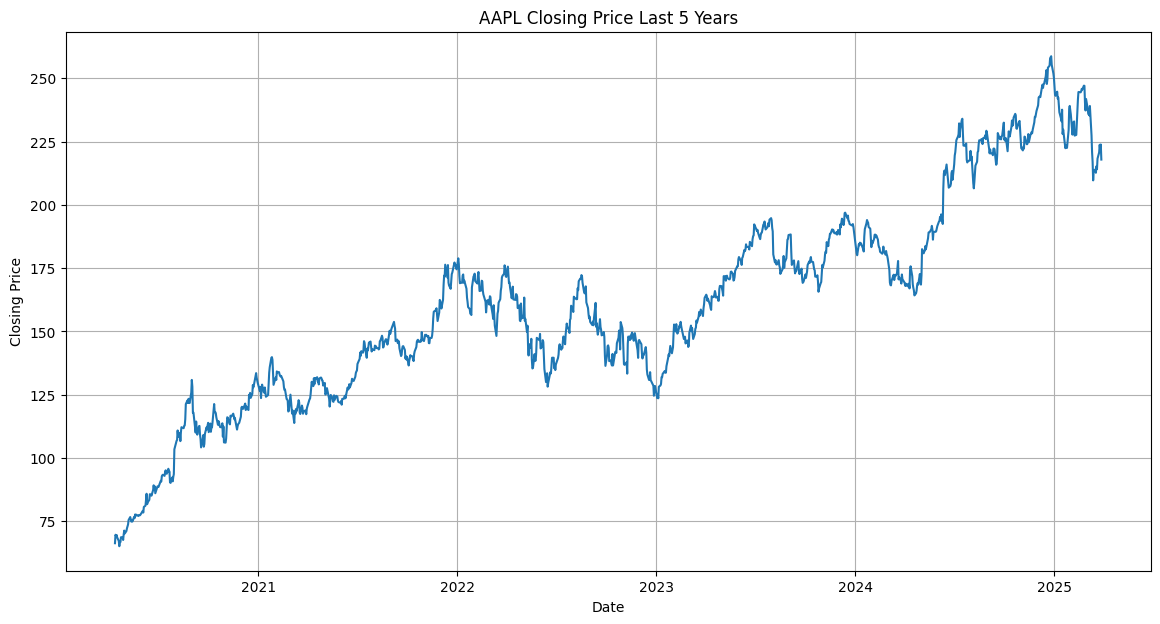

In [ ]:

# Filter data for the last 5 years
last_five_year_data = data[data['Date'] >= (pd.to_datetime('today') - pd.DateOffset(years=5))]
last_five_year_data.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(last_five_year_data['Close'])
plt.title('AAPL Closing Price Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()


In [ ]:
summary_statistics = data.describe()
print(summary_statistics)

                                Date        Close         High          Low  \
count                           3833  3833.000000  3833.000000  3833.000000   
mean   2017-08-13 18:36:54.662144512    70.049196    70.736361    69.291143   
min              2010-01-04 00:00:00     5.779475     5.898344     5.725308   
25%              2013-10-23 00:00:00    17.621912    17.770614    17.430117   
50%              2017-08-14 00:00:00    36.087345    36.277370    35.759535   
75%              2021-06-04 00:00:00   130.673401   131.975539   128.974723   
max              2025-03-28 00:00:00   258.735504   259.814335   257.347047   
std                              NaN    68.174889    68.829711    67.433329   

              Open        Volume  
count  3833.000000  3.833000e+03  
mean     69.994082  2.271930e+08  
min       5.789106  2.323470e+07  
25%      17.635613  8.344160e+07  
50%      36.061580  1.376104e+08  
75%     130.728767  3.038756e+08  
max     257.906429  1.880998e+09  
std     

In [ ]:
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

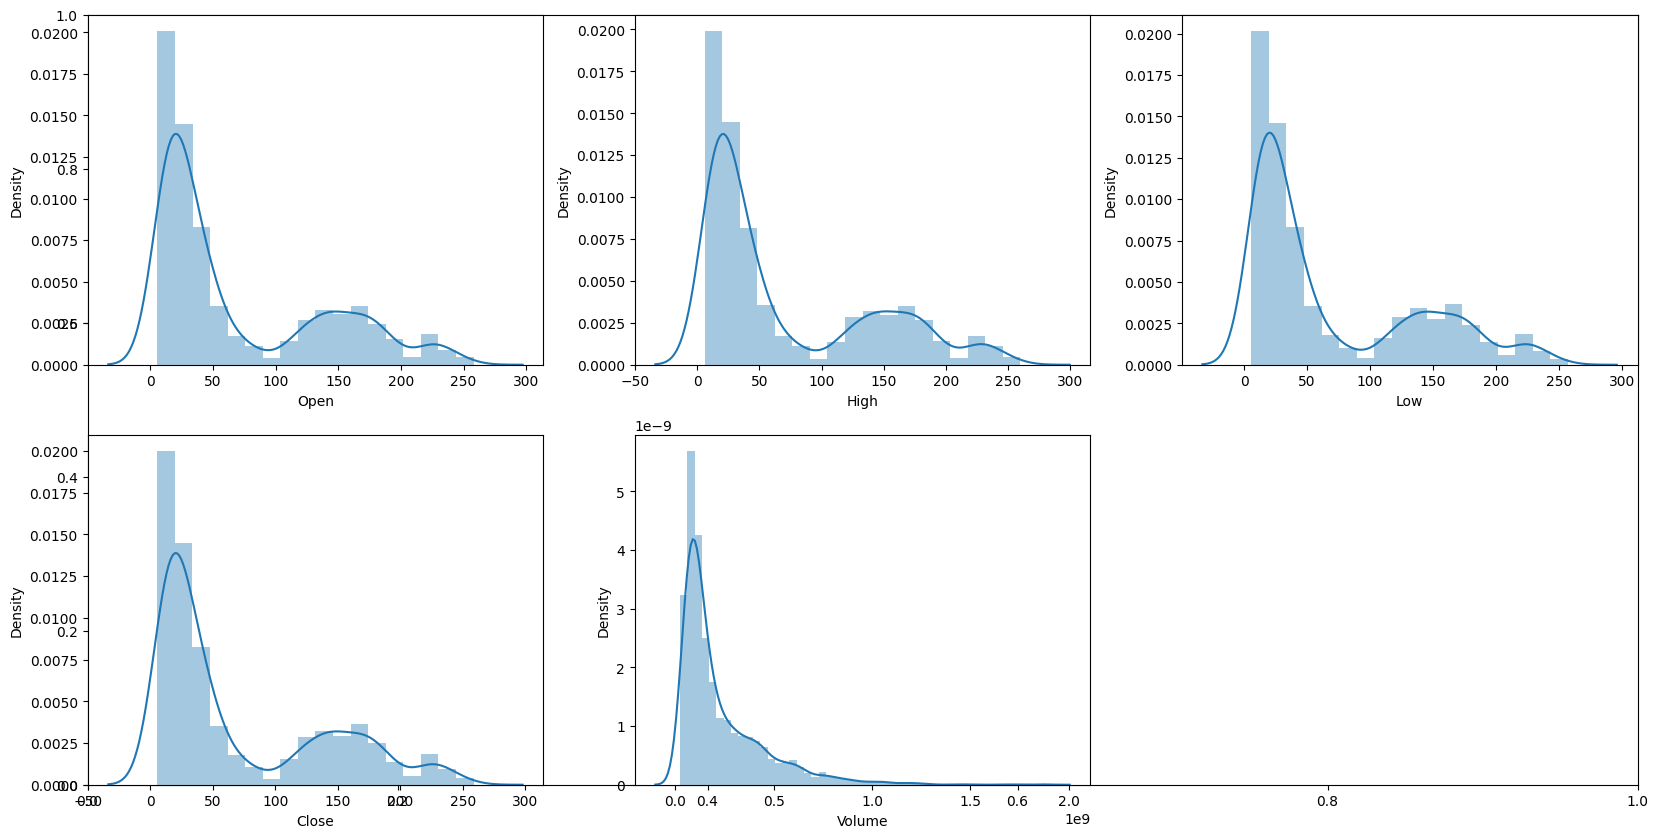

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

 we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

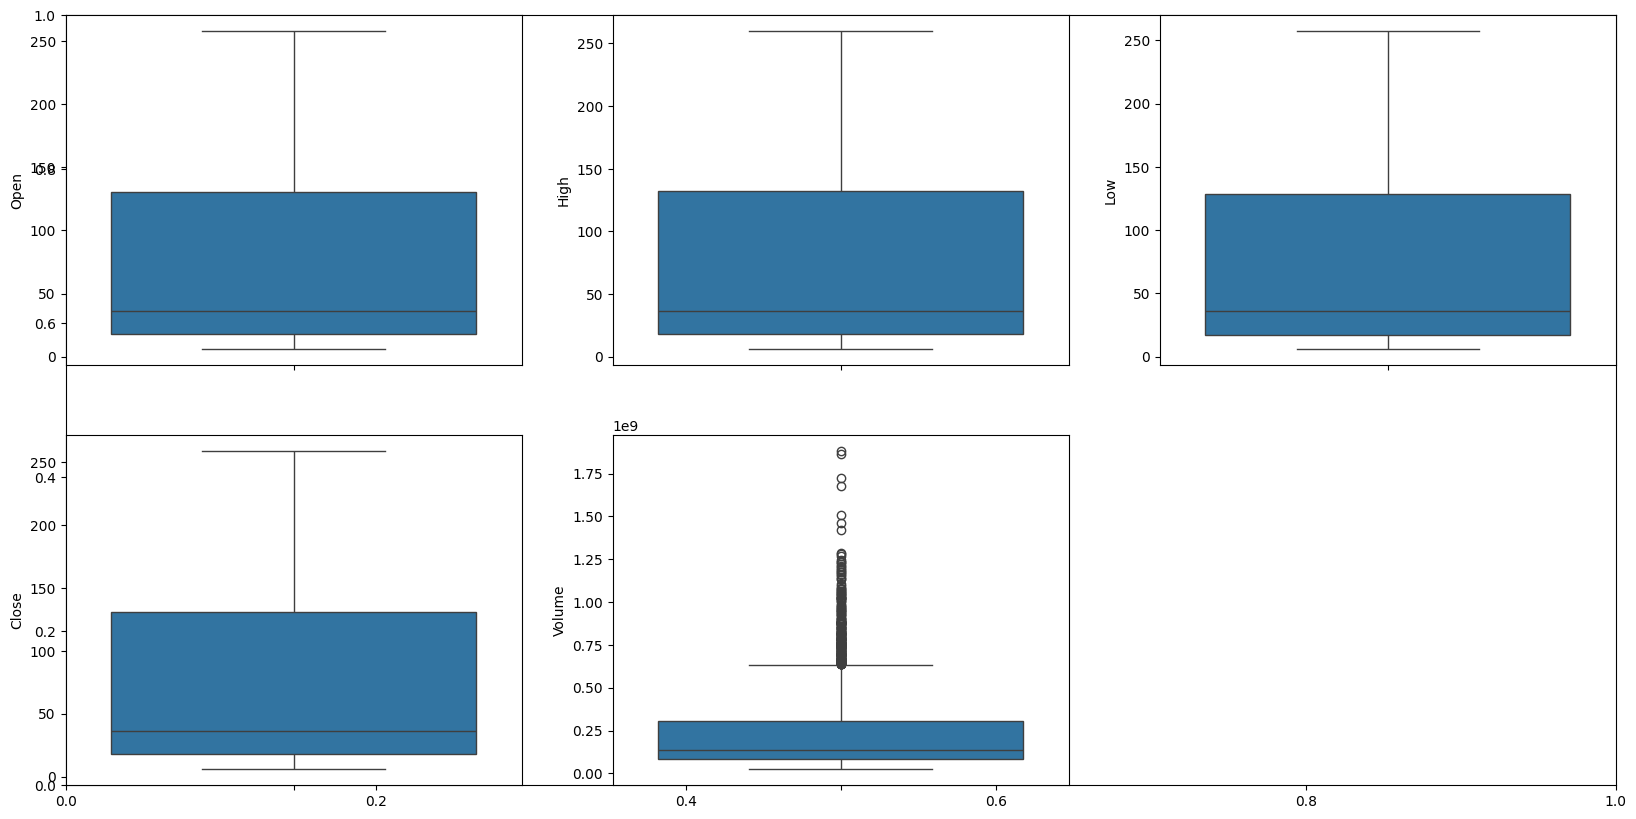

In [8]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

# Feature Engineering
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.




In [9]:
# Convert the 'Date' column to string format
splitted = data['Date'].dt.strftime('%m/%d/%Y').str.split('/', expand=True)

data['day'] = splitted[1].astype('int')
data['month'] = splitted[0].astype('int')
data['year'] = splitted[2].astype('int')

data.head()


,Date,Close,High,Low,Open,Volume,day,month,year
0,2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,4,1,2010
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,5,1,2010
2,2010-01-06,6.348845,6.477043,6.342224,6.451464,552160000,6,1,2010
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,7,1,2010
4,2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800,8,1,2010


In [ ]:
# create a new column 'is_quarter_end' which is 1 if the month is the last day of the quarter
data['is_quarter_end'] = # your code here
data.head()

,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
0,2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,4,1,2010,0
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,5,1,2010,0
2,2010-01-06,6.348845,6.477043,6.342224,6.451464,552160000,6,1,2010,0
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,7,1,2010,0
4,2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800,8,1,2010,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.


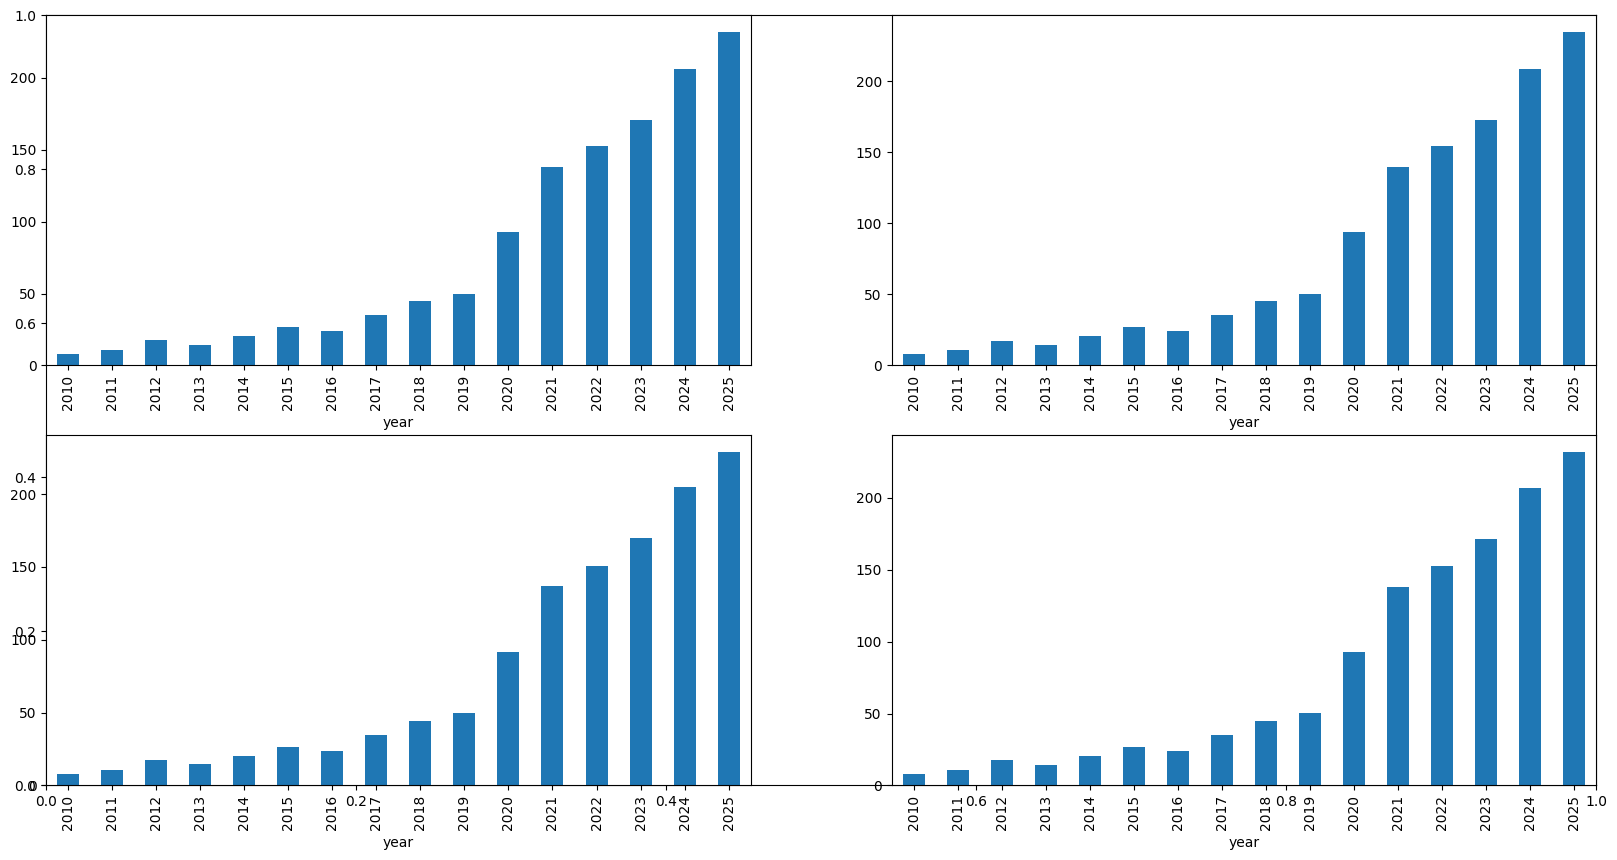

In [11]:
data_grouped = data.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()



In [12]:
data.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Close,High,Low,Open,Volume,day,month,year
is_quarter_end,,,,,,,,
0,69.715825,70.364358,68.964534,69.631579,2.296993e+08,15.711198,6.023183,2017.134774
1,70.707914,71.471415,69.936500,70.710364,2.222406e+08,15.758540,7.367236,2017.096273


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [ ]:
# create two features open-close and low-high 
data['open-close']  = # your code here
data['low-high']  = # your code here
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data.head()


,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,4,1,2010,0,-0.017454,-0.063798,1
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,5,1,2010,0,0.006621,-0.070419,0
2,2010-01-06,6.348845,6.477043,6.342224,6.451464,552160000,6,1,2010,0,0.102619,-0.134820,0
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,7,1,2010,0,0.035210,-0.088777,1
4,2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800,8,1,2010,0,-0.050557,-0.088475,0


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

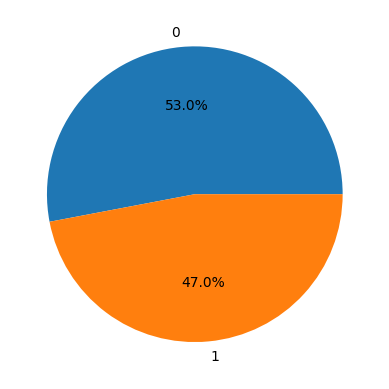

In [14]:
plt.pie(data['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

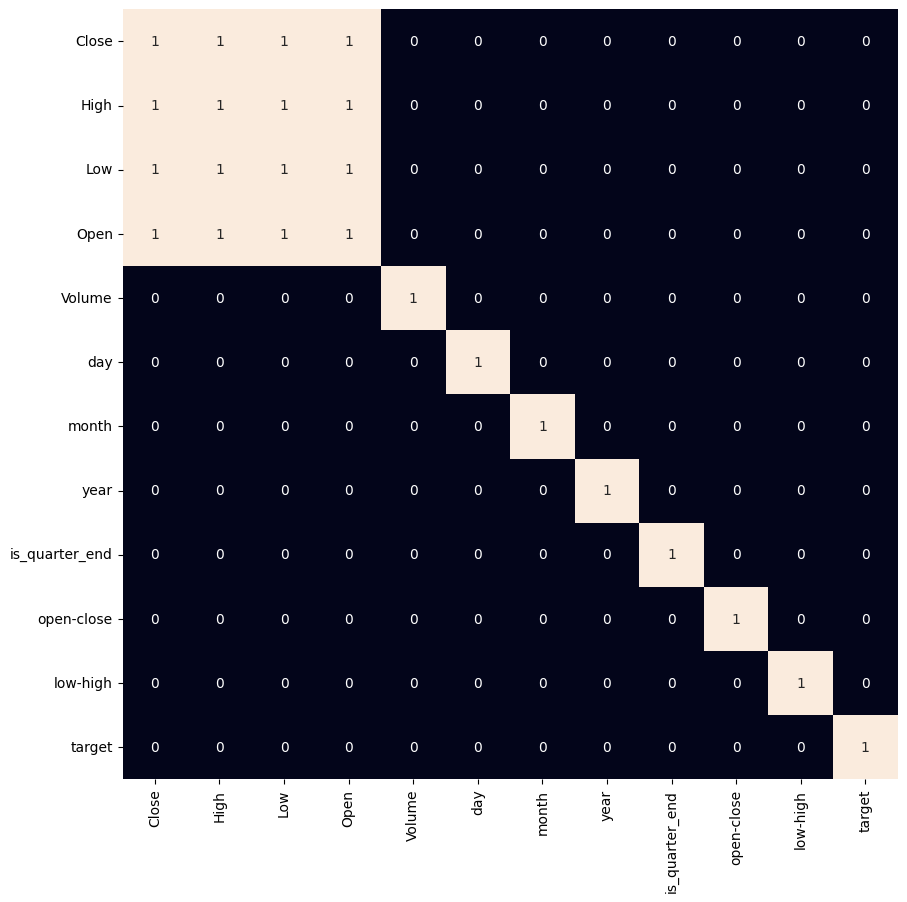

In [15]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(data.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data Splitting and Normalization


In [ ]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']

# apply standard scaling  to the features


X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_valid.shape)


(3066, 3) (767, 3)


In [ ]:
# define the models 1) Logistic Regression 2) SVC with poly kernel 3) XGBoost
models = #your code here

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5097992212924221
Validation Accuracy :  0.4965879372343903

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5233449900183225
Validation Accuracy :  0.49886945624931894

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Train

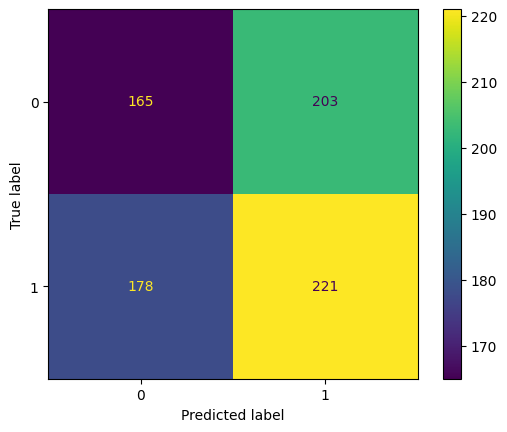

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# do a confustion matrix display for the best performing model
# your code here
plt.show()

